# SpaceX  Falcon 9 - Trabalho Final da Disciplina Ciência de Dados 


## Grupo 5

Neste trabalho iremos usar as técnicas aprendidas no curso de Ciência de dados para prever se o primeiro estágio da Falcon 9 irá pousar com sucesso. 
Serão dois notebooks. No primeiro deles é usaremos Python e suas biblipotecas: Pandas, Matplot, Seaborn e Numpy para gerar gráficos como suporte para a análise exploratória de dados


In [84]:
# prespõe que o python e as bibliotecas jão estão instaladas e configuradas no ambiente.
# uma sugestão de instalação é atráves do piplite
#import piplite
#await piplite.install(['numpy'])
#await piplite.install(['pandas'])
#await piplite.install(['seaborn'])

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
# Carrega-se o data set a partir da versão já tratada. Poderíamos carregar através de uma URL, mas partimos do arquivo já tratado pela ferramenta web infomrada na aula.
# por isso buscamos localmente

df=pd.read_csv("dataset_part_2.csv")
#Exibe as 5 primeiras linhas do dataset
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [86]:
# Busca informações genéricas do dataset 
# para verificar a presença de nulos e os 
# tipos após o tratamento dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

In [87]:
# Busca informações estatísticas # preliminares para facilitar o # entendimento do conjunto de dados
df.describe()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude,Class
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,6104.959412,1.788889,3.500000,1.655556,-86.366477,29.449963,0.666667
std,26.124701,4694.671720,1.213172,1.595288,1.710254,14.149518,2.141306,0.474045
min,1.000000,350.000000,1.000000,1.000000,0.000000,-120.610829,28.561857,0.000000
25%,23.250000,2510.750000,1.000000,2.000000,0.000000,-80.603956,28.561857,0.000000
50%,45.500000,4701.500000,1.000000,4.000000,1.000000,-80.577366,28.561857,1.000000
75%,67.750000,8912.750000,2.000000,5.000000,3.000000,-80.577366,28.608058,1.000000
max,90.000000,15600.000000,6.000000,5.000000,5.000000,-80.577366,34.632093,1.000000


In [88]:
# Uma função ara extrair o ano  

year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

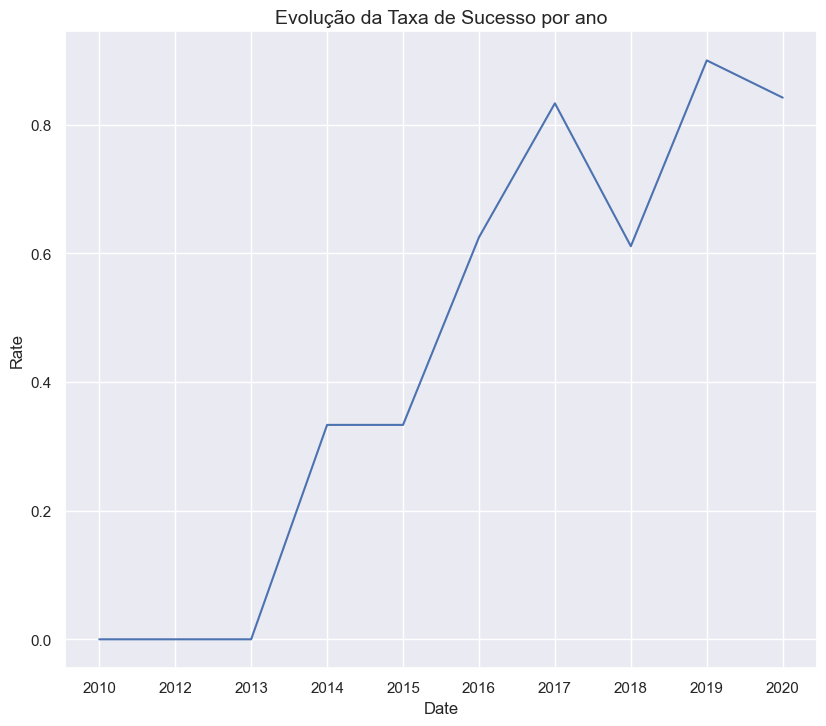

<Figure size 970x827 with 0 Axes>

In [89]:

# Plota a um gráfico de linha com o exiso representado a escala de tempo em anos 
# e o eixo y com a taxa de sucesso
Extract_year()
df['Date'] = year

df_ano = df.groupby(['Date']).agg(Rate=("Class",'mean'))
df_ano = df_ano.reset_index()

plt.title('Evolução da Taxa de Sucesso por ano',fontsize=14)
sns.lineplot(x="Date", y="Rate",data = df_ano)

plt.figure(figsize=(9.7, 8.27))
plt.show()

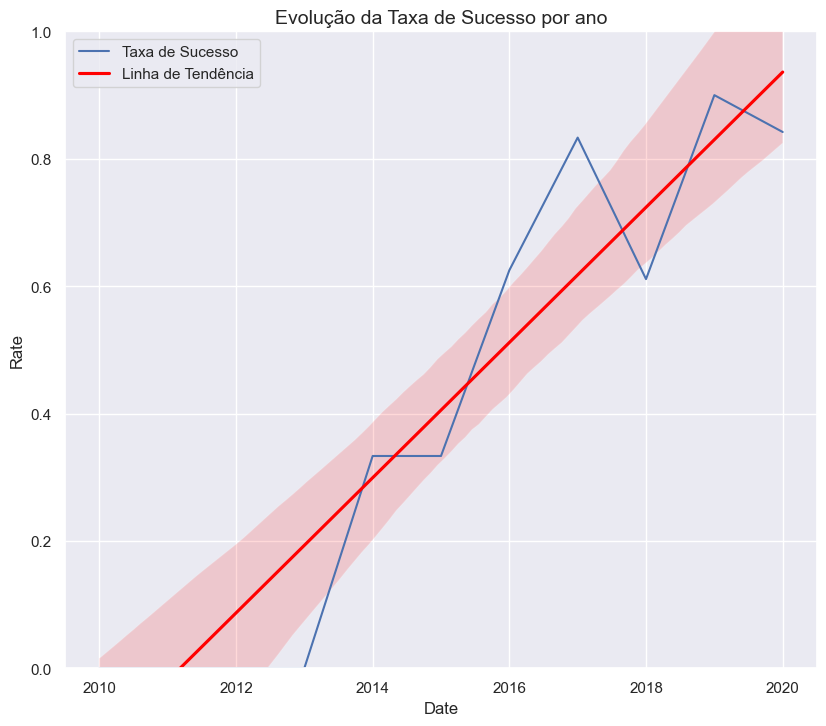

In [62]:
#agora uma segunda tentatica com tendência
df_ano = df.groupby(['Date']).agg(Rate=("Class", 'mean'))
df_ano = df_ano.reset_index()

# Filtra as taxas de sucesso para garantir que sejam >= 0.0
df_ano = df_ano[df_ano['Rate'] >= 0.0]

plt.figure(figsize=(9.7, 8.27))
plt.title('Evolução da Taxa de Sucesso por ano', fontsize=14)

# Plota a linha de evolução da taxa de sucesso
sns.lineplot(x="Date", y="Rate", data=df_ano, label='Taxa de Sucesso')

# Adiciona a linha de tendência
sns.regplot(x="Date", y="Rate", data=df_ano, scatter=False, label='Linha de Tendência', color='red')

# Configurações adicionais
sns.set(rc={'figure.figsize': (9.7, 8.27)})
plt.legend()
plt.ylim(0, 1)  # Garante que o eixo y comece em 0

plt.show()

C:\Users\U3V2\AppData\Local\Temp\ipykernel_28192\1335862325.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grp_bar.set_xticklabels(grp_bar.get_xticklabels(), fontsize = 10, rotation = 90);


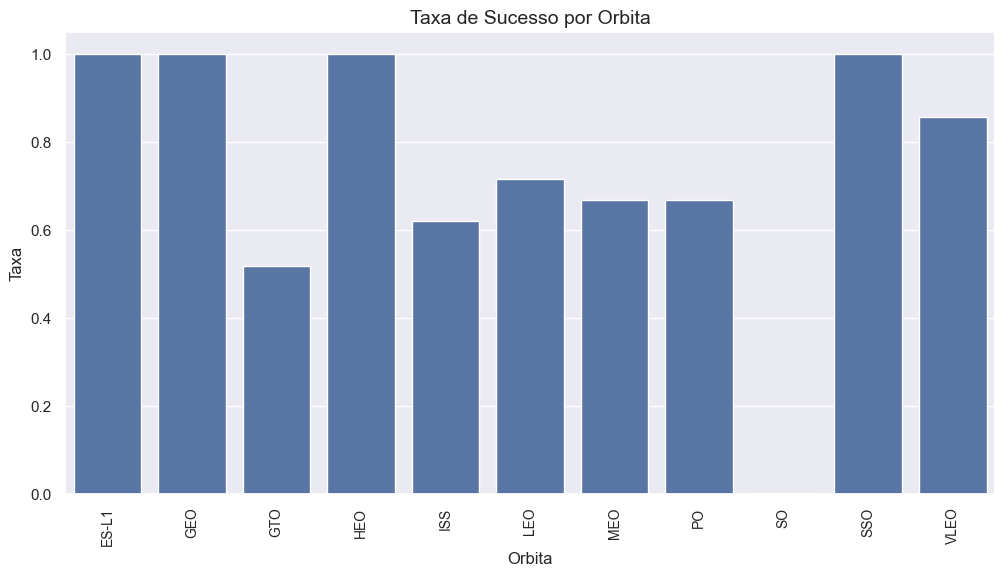

In [90]:


df_orbita = df.groupby(['Orbit']).agg(Class=("Class",'mean'))
df_orbita = df_orbita.reset_index()

fig, grp_bar=plt.subplots(figsize=(12,6))
grp_bar = sns.barplot(x="Orbit", y="Class", data = df_orbita)
grp_bar.set_title('Taxa de Sucesso por Orbita',fontsize=14)
grp_bar.set_xlabel('Orbita', fontsize = 12)
grp_bar.set_ylabel('Taxa', fontsize = 12)

grp_bar.set_xticklabels(grp_bar.get_xticklabels(), fontsize = 10, rotation = 90);


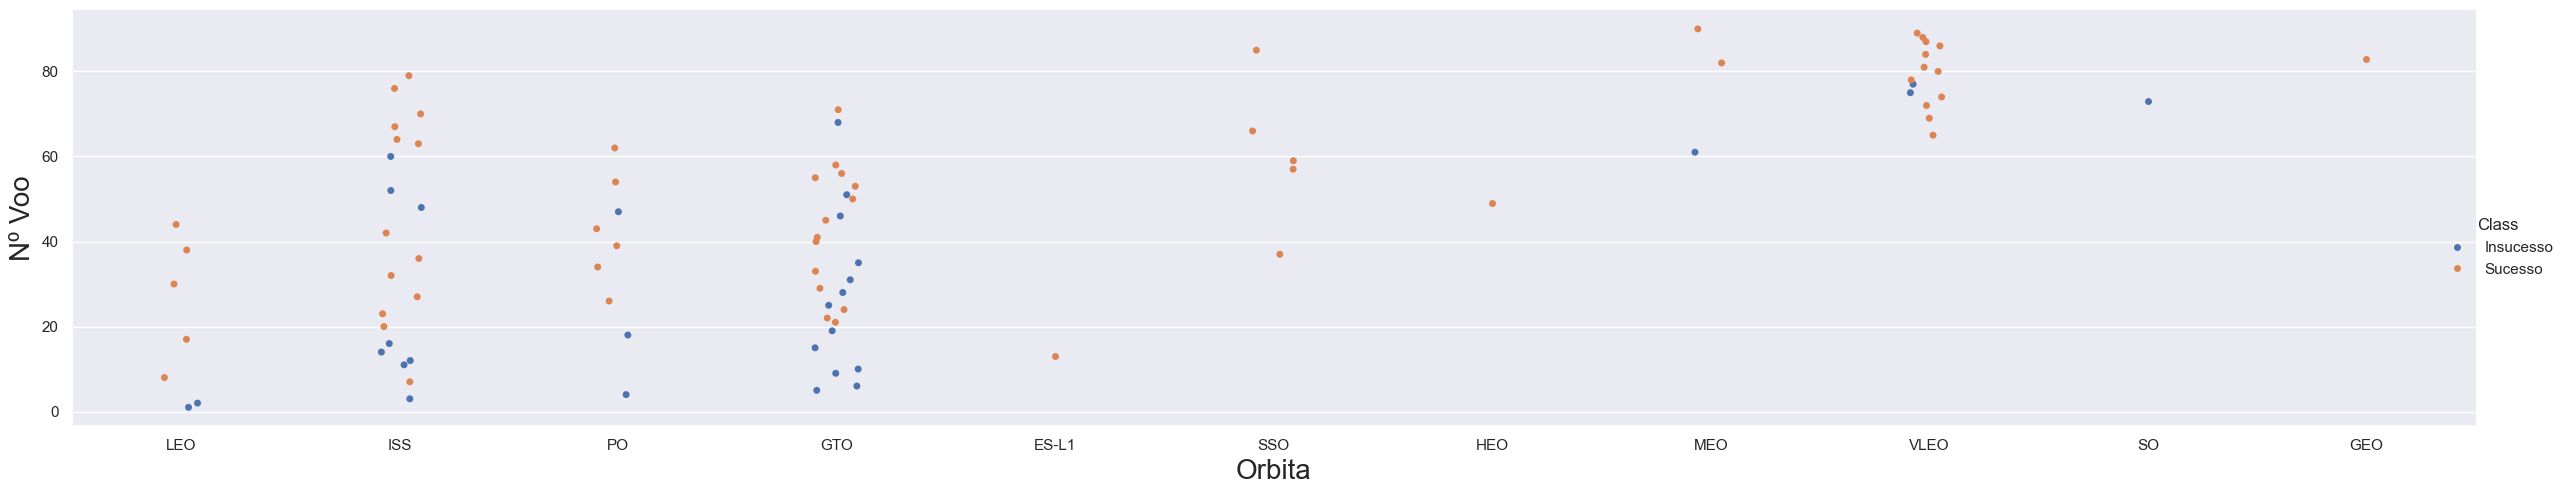

In [95]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
#sns.catplot(y="FlightNumber", x="Orbit", hue="Class", data=df, aspect = 5)
g = sns.catplot(y="FlightNumber", x="Orbit", hue="Class", data=df, aspect=5)
plt.xlabel("Orbita",fontsize=20)
plt.ylabel("Nº Voo",fontsize=20)
new_labels = ['Insucesso', 'Sucesso']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
plt.show()

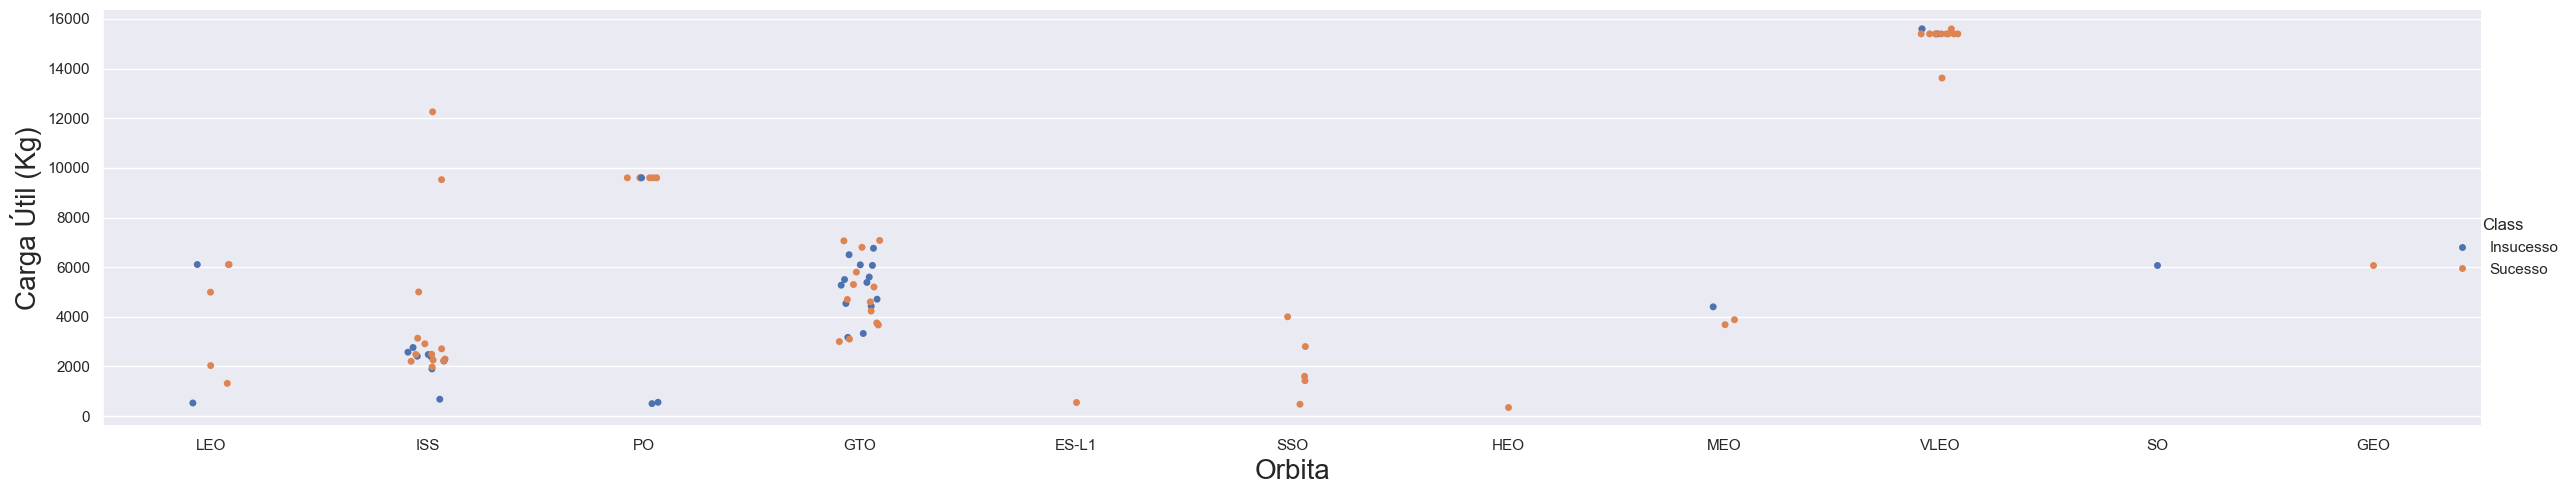

In [97]:

g = sns.catplot(y="PayloadMass", x="Orbit", hue="Class", data=df, aspect = 5)
plt.xlabel("Orbita",fontsize=20)
plt.ylabel("Carga Útil (Kg)",fontsize=20)
new_labels = ['Insucesso', 'Sucesso']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
plt.show()

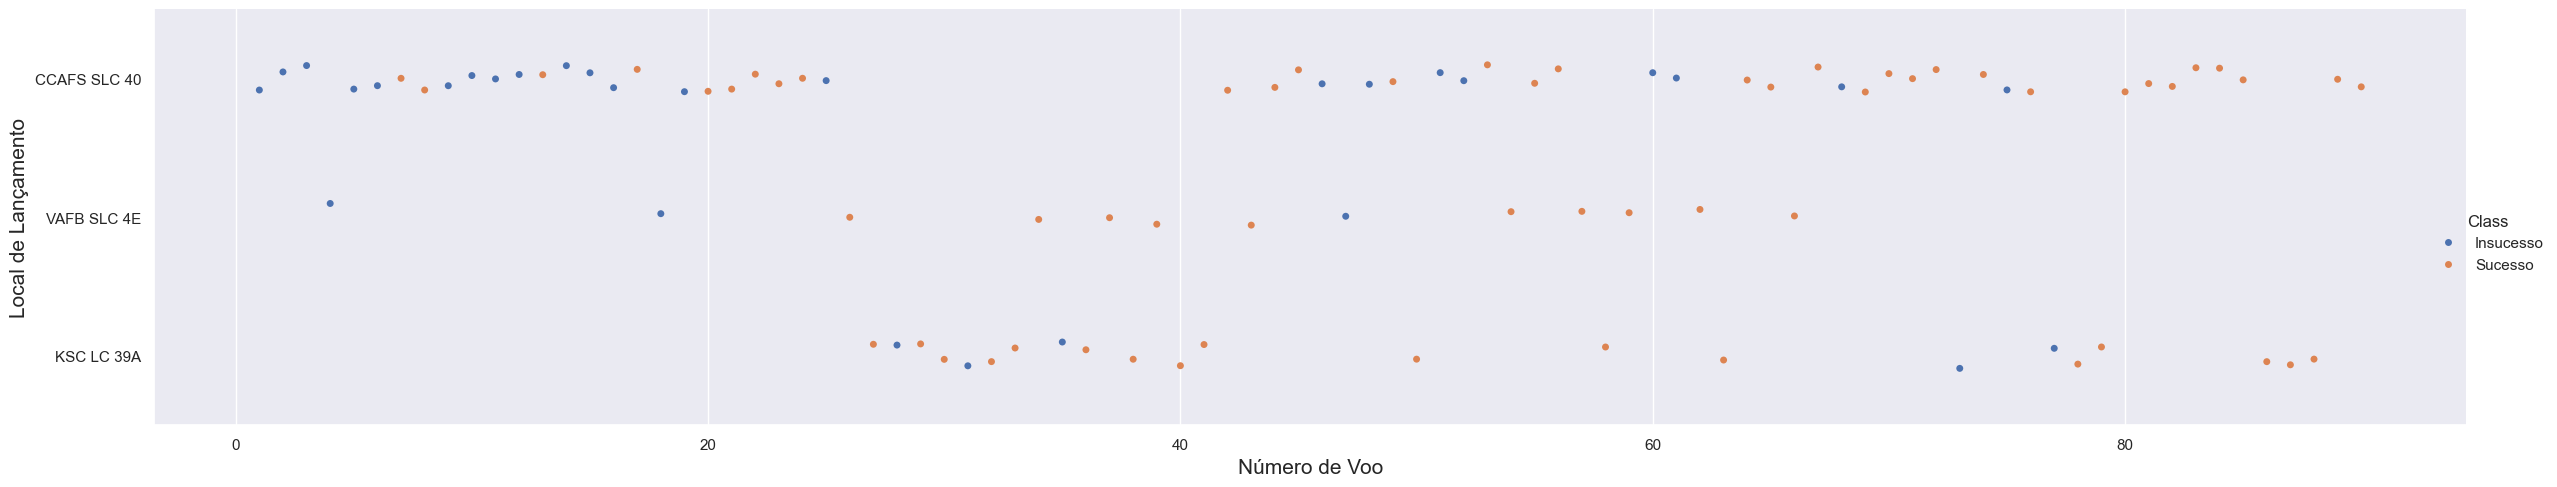

In [98]:
g = sns.catplot(y="LaunchSite",x="FlightNumber",hue="Class", data=df, aspect = 5)

plt.ylabel("Local de Lançamento",fontsize=15)

plt.xlabel("Número de Voo",fontsize=15)

for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
plt.show()

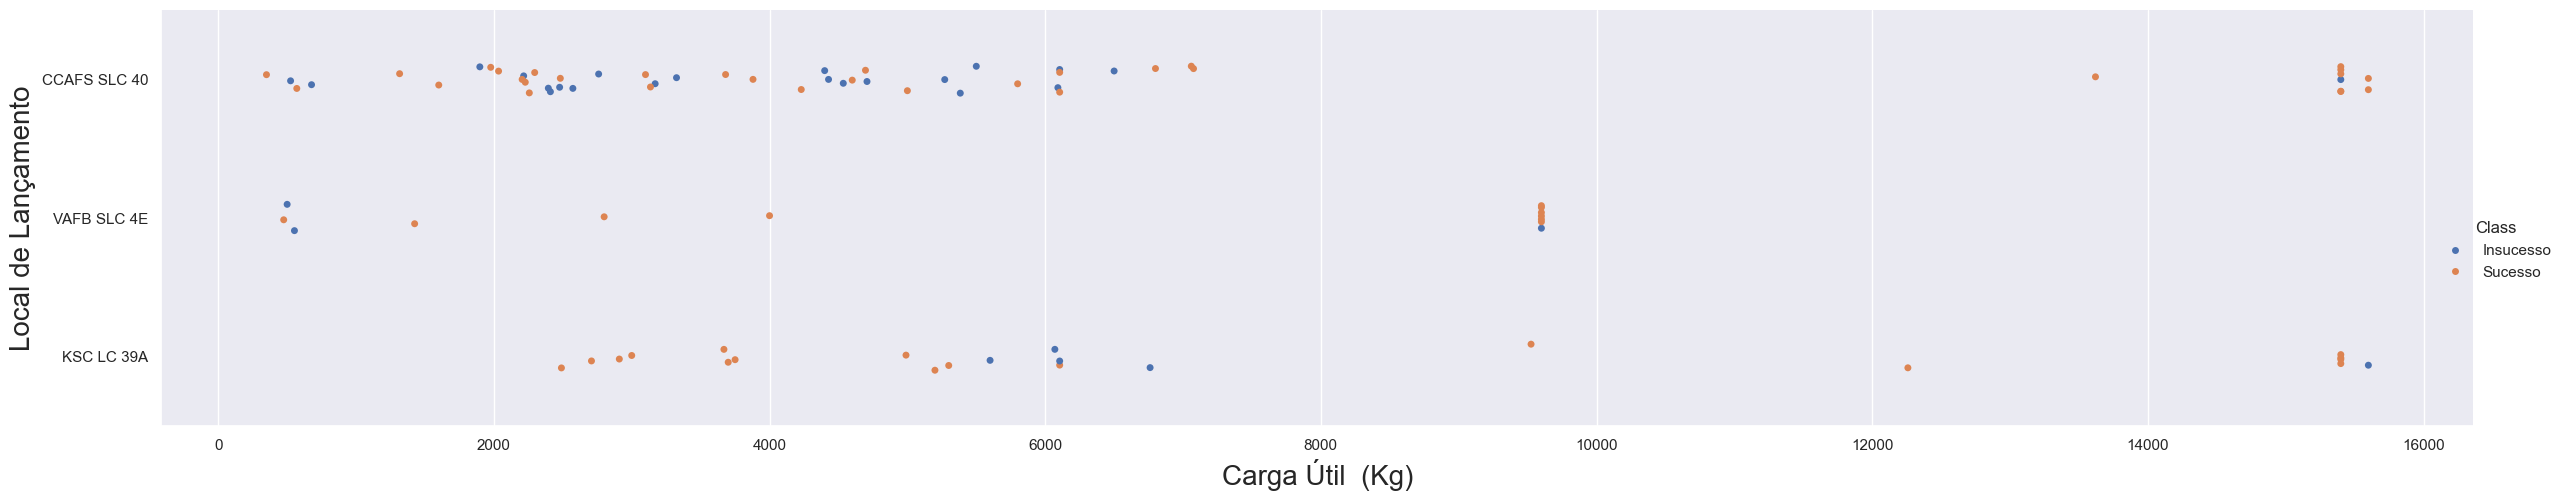

In [104]:
g = sns.catplot(y="LaunchSite",x="PayloadMass",hue="Class", data=df, aspect = 5)

plt.xlabel("Carga Útil  (Kg)",fontsize=20)
plt.ylabel("Local de Lançamento",fontsize=20)
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
plt.show()